In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
file_path = r'C:\Users\s.s tecnologies\Videos\super market\data.csv'

df = pd.read_csv(file_path, encoding='latin-1')

print(f"✅ Dataset loaded successfully!")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")

✅ Dataset loaded successfully!
Total rows: 541,909
Total columns: 8


In [5]:
# First 10 rows dekho
print("First 10 rows:")
print(df.head(10))

print("\n" + "="*60)
print("Column names:")
print(df.columns.tolist())

print("\n" + "="*60)
print("Data types:")
print(df.dtypes)

First 10 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:

In [6]:
# Check missing values
print("Missing Values:")
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_percent
})

print(missing_data[missing_data['Missing_Count'] > 0])

Missing Values:
             Missing_Count  Percentage
Description           1454    0.268311
CustomerID          135080   24.926694


In [7]:
# Data Cleaning
print("Original dataset:", len(df), "rows")

# Remove rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Remove cancelled orders (starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative quantities and zero prices
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Convert date to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Create new columns
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

print("Cleaned dataset:", len(df_clean), "rows")
print(f"Removed: {len(df) - len(df_clean)} rows")

Original dataset: 541909 rows
Cleaned dataset: 397884 rows
Removed: 144025 rows


In [8]:
# Calculate Key Metrics
total_revenue = df_clean['TotalAmount'].sum()
total_orders = df_clean['InvoiceNo'].nunique()
total_customers = df_clean['CustomerID'].nunique()
avg_order_value = df_clean.groupby('InvoiceNo')['TotalAmount'].sum().mean()

print("="*60)
print("KEY BUSINESS METRICS")
print("="*60)
print(f"💰 Total Revenue: £{total_revenue:,.2f}")
print(f"🛒 Total Orders: {total_orders:,}")
print(f"👥 Total Customers: {total_customers:,}")
print(f"📊 Average Order Value: £{avg_order_value:,.2f}")

KEY BUSINESS METRICS
💰 Total Revenue: £8,911,407.90
🛒 Total Orders: 18,532
👥 Total Customers: 4,338
📊 Average Order Value: £480.87


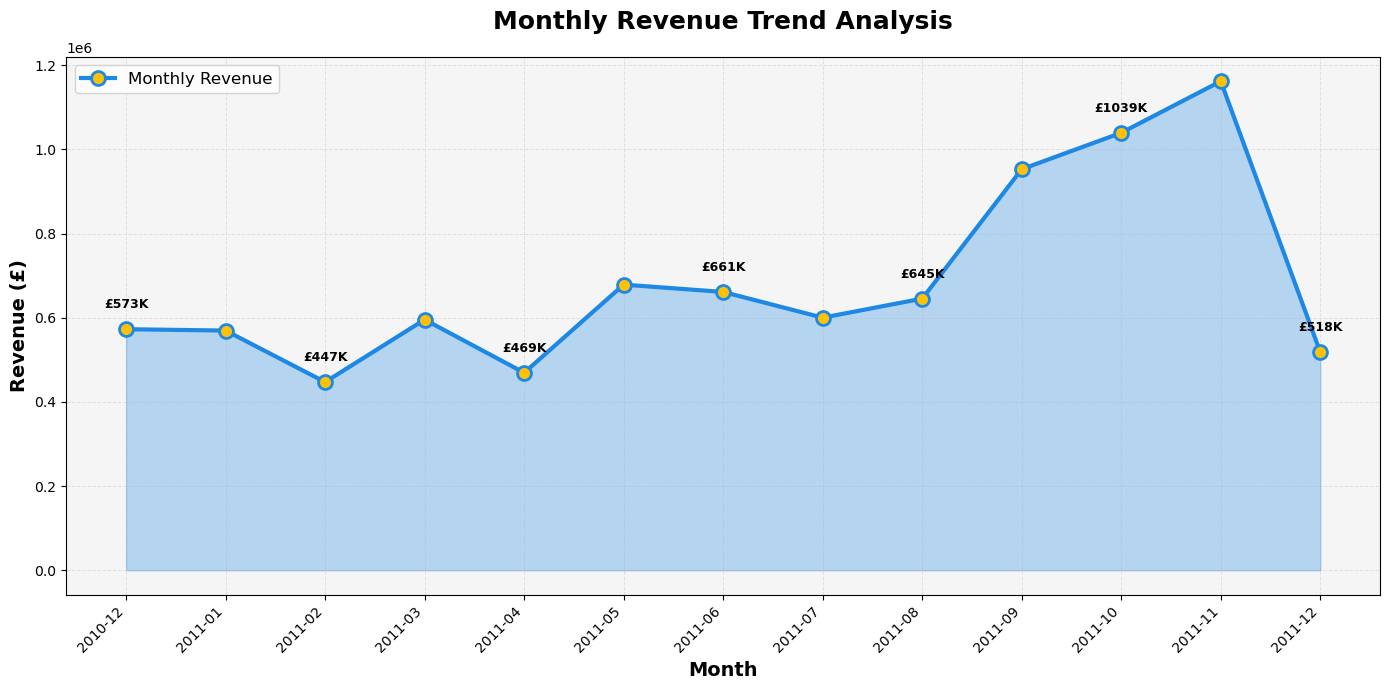

✅ Advanced monthly revenue chart created!


In [10]:
# Advanced Monthly Revenue Trend
monthly_revenue = df_clean.groupby(df_clean['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum()

fig, ax = plt.subplots(figsize=(14, 7))

# Plot with gradient effect
x = range(len(monthly_revenue))
y = monthly_revenue.values

ax.plot(x, y, marker='o', color='#1E88E5', linewidth=3, markersize=10, 
        markerfacecolor='#FFC107', markeredgewidth=2, markeredgecolor='#1E88E5',
        label='Monthly Revenue')

# Fill area under the line
ax.fill_between(x, y, alpha=0.3, color='#1E88E5')

# Add value labels on points
for i, v in enumerate(y):
    if i % 2 == 0:  # Show every alternate value to avoid clutter
        ax.text(i, v + 50000, f'£{v/1000:.0f}K', ha='center', fontsize=9, fontweight='bold')

# Styling
ax.set_title('Monthly Revenue Trend Analysis', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Revenue (£)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(monthly_revenue.index.astype(str), rotation=45, ha='right')
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.legend(loc='upper left', fontsize=12)

# Add background color
ax.set_facecolor('#F5F5F5')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

print("✅ Advanced monthly revenue chart created!")

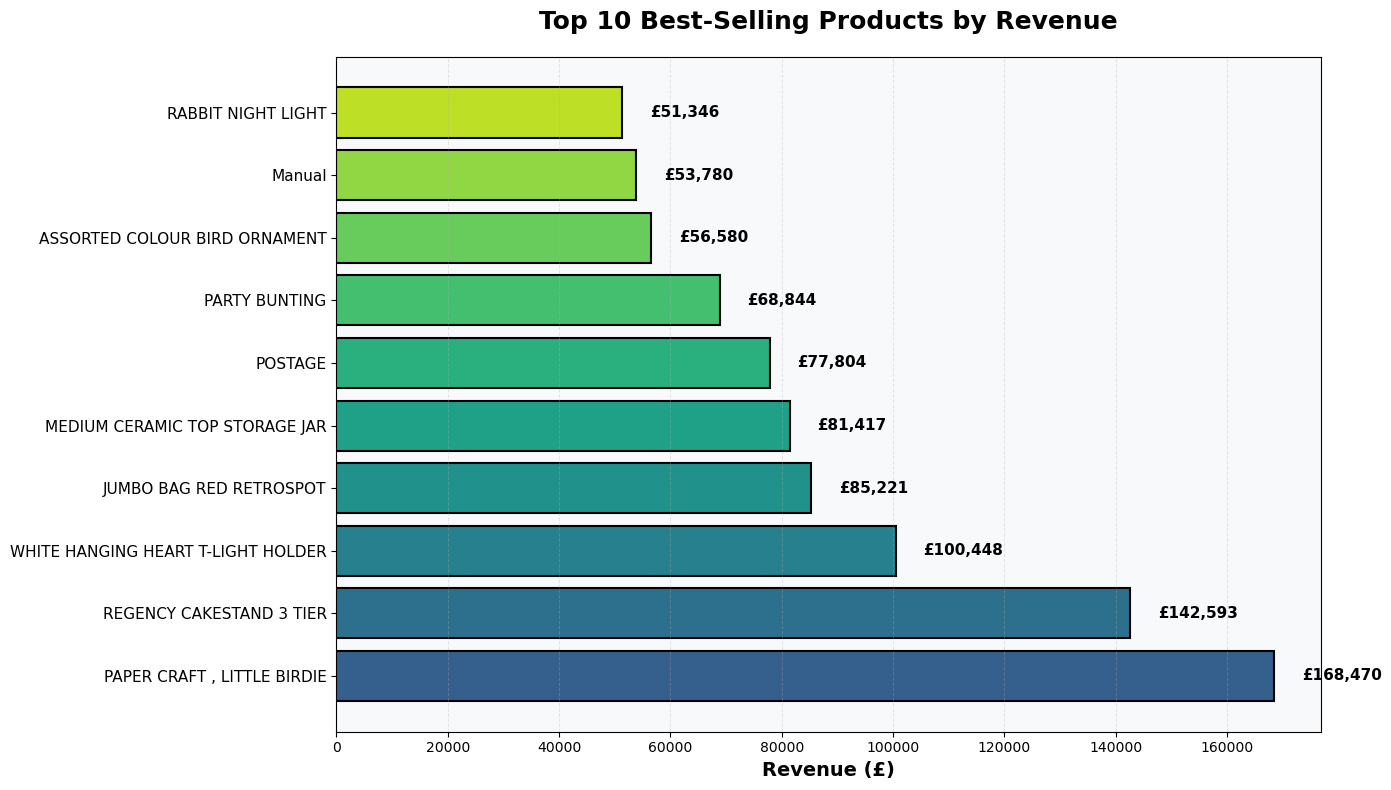

✅ Advanced top products chart created!

🏆 Best Product: PAPER CRAFT , LITTLE BIRDIE
💰 Revenue: £168,469.60


In [11]:
# Advanced Top 10 Products
top_products = df_clean.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 8))

# Create horizontal bar chart with gradient colors
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_products)))
bars = ax.barh(range(len(top_products)), top_products.values, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_products.values)):
    width = bar.get_width()
    ax.text(width + 5000, bar.get_y() + bar.get_height()/2, 
            f'£{value:,.0f}', 
            ha='left', va='center', fontsize=11, fontweight='bold')

# Styling
ax.set_yticks(range(len(top_products)))
ax.set_yticklabels(top_products.index, fontsize=11)
ax.set_xlabel('Revenue (£)', fontsize=14, fontweight='bold')
ax.set_title('Top 10 Best-Selling Products by Revenue', fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

print("✅ Advanced top products chart created!")
print(f"\n🏆 Best Product: {top_products.index[0]}")
print(f"💰 Revenue: £{top_products.values[0]:,.2f}")

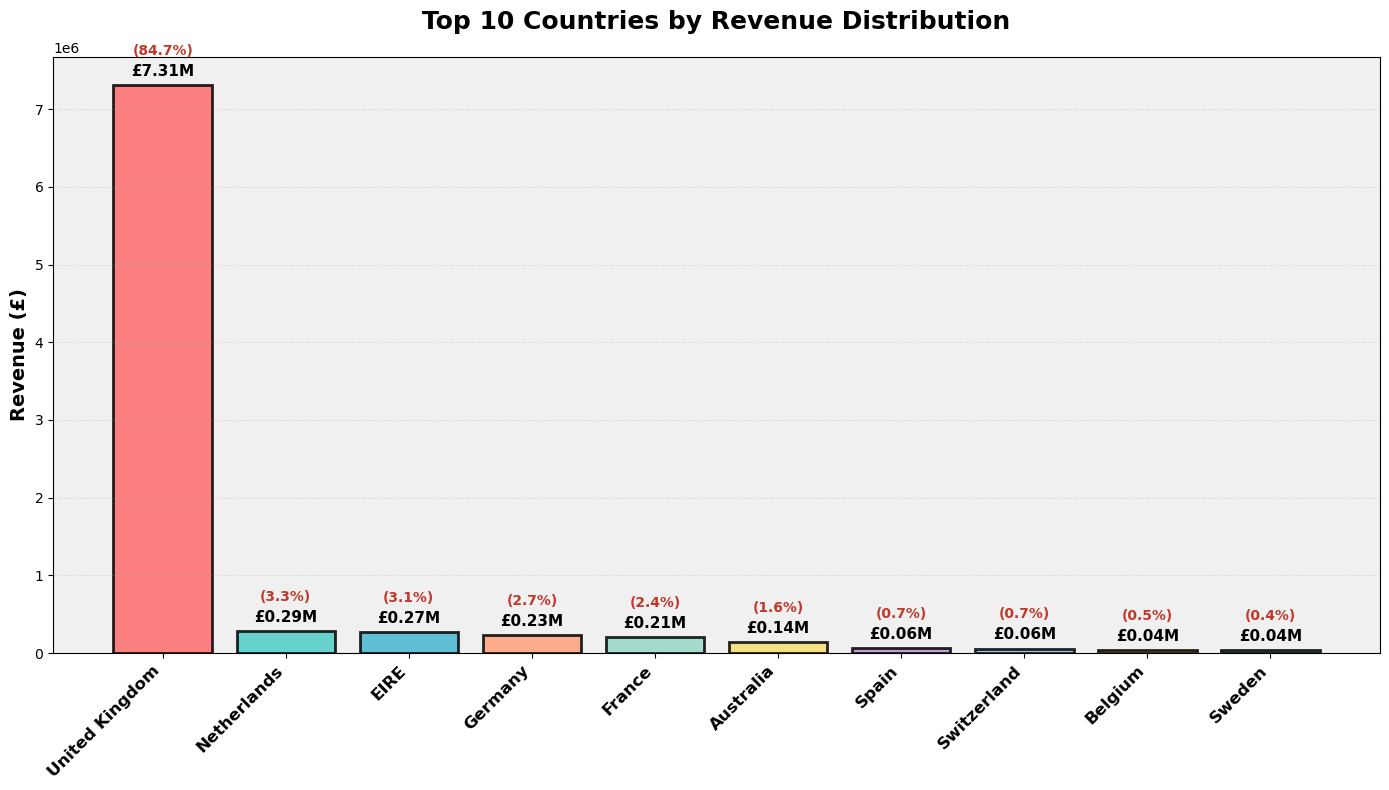

✅ Fixed spacing chart created!


In [15]:
# Advanced Top 10 Countries (More Spacing)
country_revenue = df_clean.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 8))

# Create bars with different colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', 
          '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B739', '#52B788']
bars = ax.bar(range(len(country_revenue)), country_revenue.values, color=colors, 
              edgecolor='black', linewidth=2, alpha=0.85)

# Add value labels on TOP of bars (in BLACK)
total = country_revenue.sum()
for i, (bar, value) in enumerate(zip(bars, country_revenue.values)):
    height = bar.get_height()
    percentage = (value / total) * 100
    
    # Revenue amount on top
    ax.text(bar.get_x() + bar.get_width()/2, height + 80000,
            f'£{value/1000000:.2f}M',
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
    
    # Percentage much higher above
    ax.text(bar.get_x() + bar.get_width()/2, height + 350000,
            f'({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#C0392B')

# Styling
ax.set_xticks(range(len(country_revenue)))
ax.set_xticklabels(country_revenue.index, rotation=45, ha='right', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue (£)', fontsize=14, fontweight='bold')
ax.set_title('Top 10 Countries by Revenue Distribution', fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_facecolor('#F0F0F0')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

print("✅ Fixed spacing chart created!")

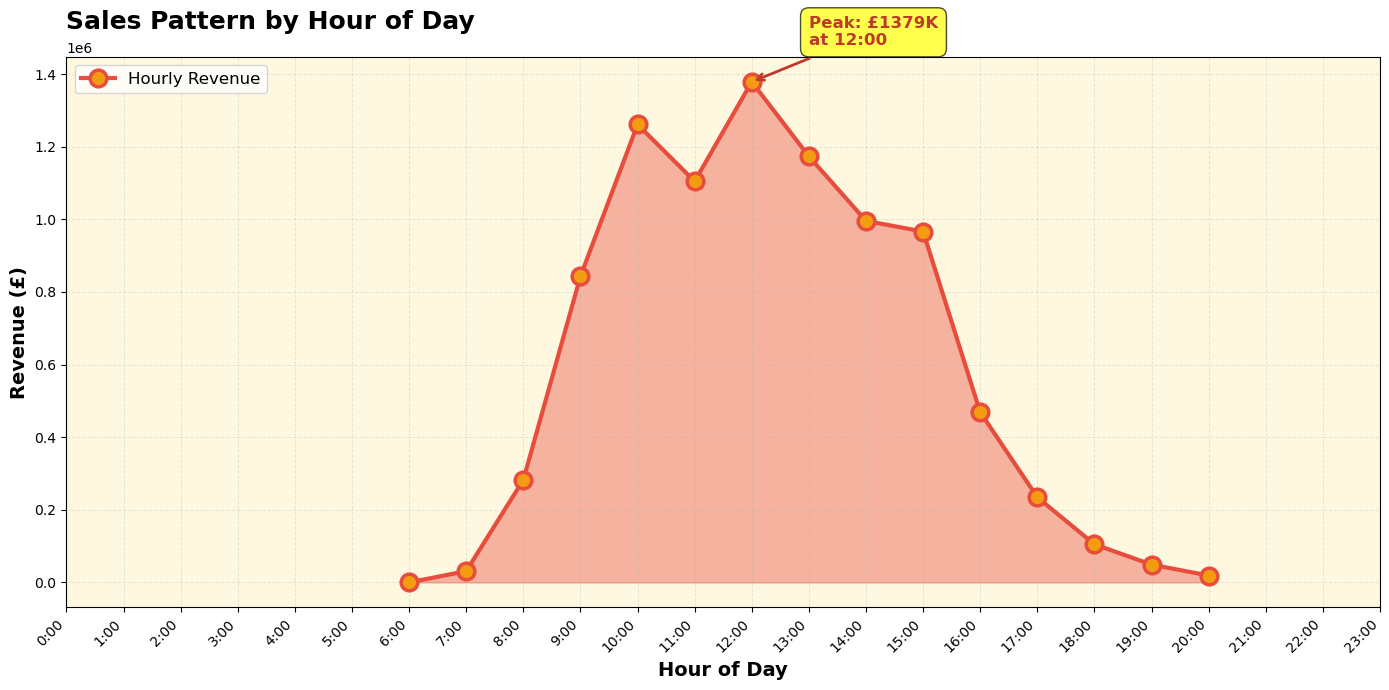

✅ Hourly sales pattern created!

⏰ Peak Hour: 12:00
💰 Peak Revenue: £1,378,571.48


In [17]:
# Advanced Hourly Sales Pattern (Title Left Aligned)
hourly_sales = df_clean.groupby('Hour')['TotalAmount'].sum()

fig, ax = plt.subplots(figsize=(14, 7))

# Create area chart with gradient
x = hourly_sales.index
y = hourly_sales.values

# Plot line
ax.plot(x, y, marker='o', color='#E74C3C', linewidth=3, markersize=12, 
        markerfacecolor='#F39C12', markeredgewidth=2.5, markeredgecolor='#E74C3C',
        label='Hourly Revenue', zorder=3)

# Fill area with gradient effect
ax.fill_between(x, y, alpha=0.4, color='#E74C3C')

# Add value labels on peak points
peak_hour = hourly_sales.idxmax()
peak_value = hourly_sales.max()
ax.annotate(f'Peak: £{peak_value/1000:.0f}K\nat {peak_hour}:00', 
            xy=(peak_hour, peak_value),
            xytext=(peak_hour+1, peak_value+100000),
            fontsize=12, fontweight='bold', color='#C0392B',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='#C0392B', lw=2))

# Styling - Title LEFT aligned
ax.set_title('Sales Pattern by Hour of Day', fontsize=18, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Revenue (£)', fontsize=14, fontweight='bold')
ax.set_xticks(range(0, 24))
ax.set_xticklabels([f'{h}:00' for h in range(0, 24)], rotation=45, ha='right')
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.legend(loc='upper left', fontsize=12)
ax.set_facecolor('#FFF8E1')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

print("✅ Hourly sales pattern created!")
print(f"\n⏰ Peak Hour: {peak_hour}:00")
print(f"💰 Peak Revenue: £{peak_value:,.2f}")

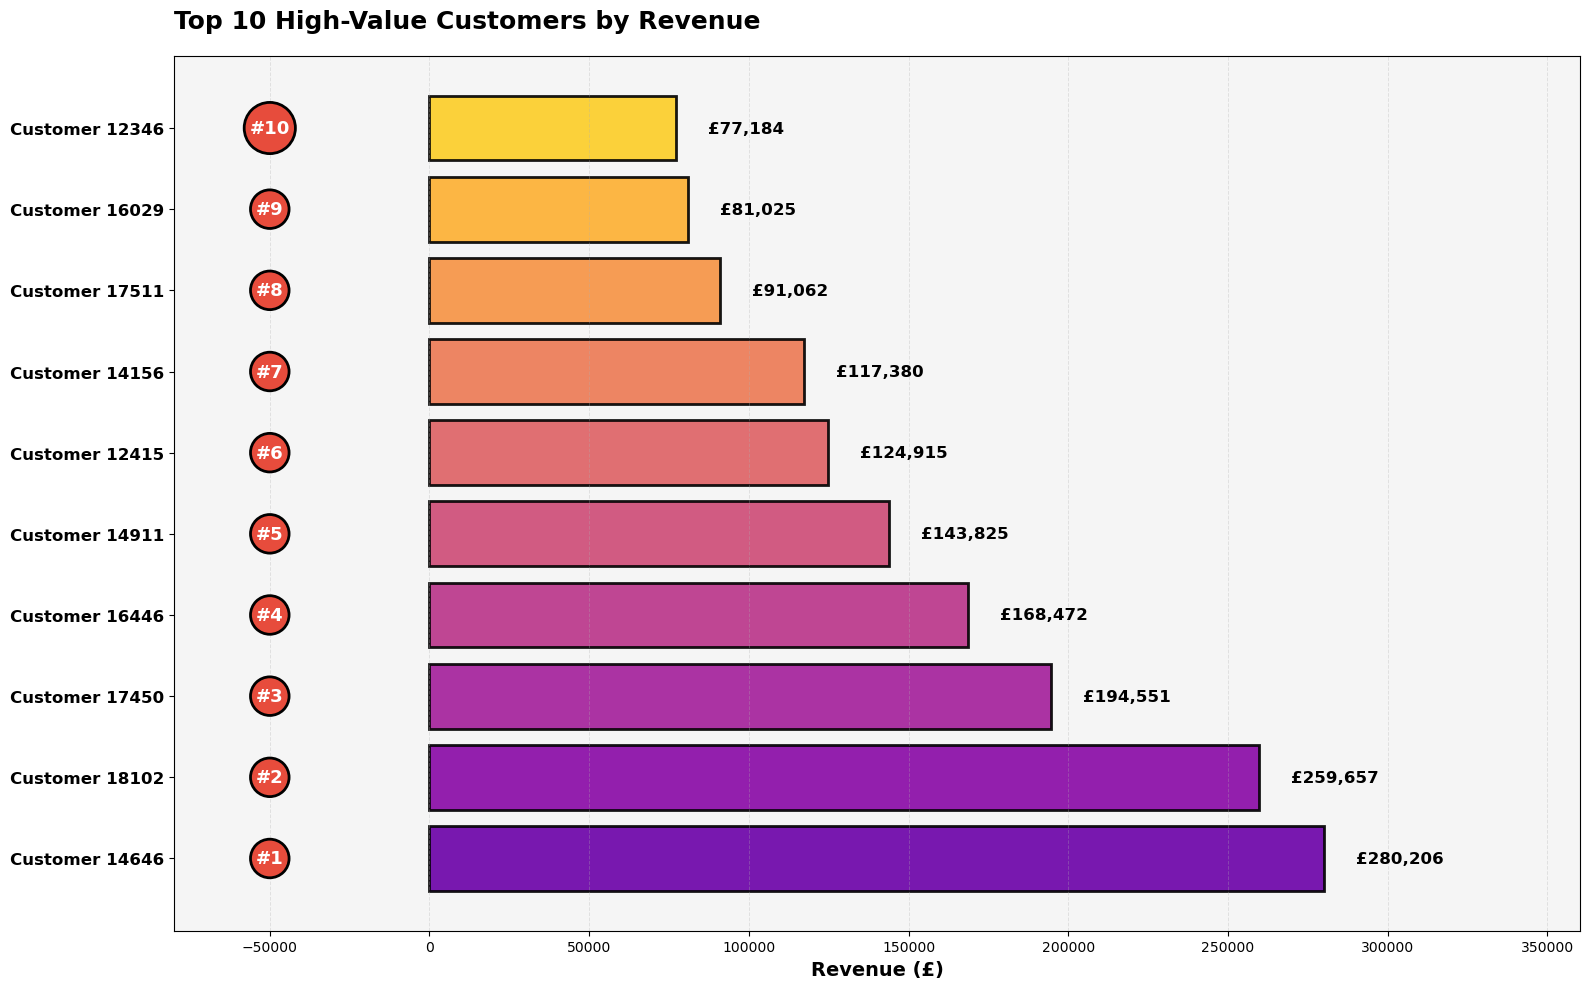

✅ Top customers chart created!

🏆 Top Customer ID: 14646
💰 Revenue: £280,206.02


In [19]:
# Advanced Top 10 Customers (Fixed)
customer_revenue = df_clean.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(16, 10))

# Create horizontal bars with gradient colors
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(customer_revenue)))
bars = ax.barh(range(len(customer_revenue)), customer_revenue.values, color=colors, 
               edgecolor='black', linewidth=2, alpha=0.9)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, customer_revenue.values)):
    width = bar.get_width()
    ax.text(width + 10000, bar.get_y() + bar.get_height()/2, 
            f'£{value:,.0f}', 
            ha='left', va='center', fontsize=12, fontweight='bold', color='black')

# Add rank badges on FAR LEFT
for i, bar in enumerate(bars):
    ax.text(-50000, bar.get_y() + bar.get_height()/2, 
            f'#{i+1}', 
            ha='center', va='center', fontsize=13, fontweight='bold', 
            color='white', bbox=dict(boxstyle='circle', facecolor='#E74C3C', edgecolor='black', linewidth=2))

# Styling
ax.set_yticks(range(len(customer_revenue)))
ax.set_yticklabels([f'Customer {int(cid)}' for cid in customer_revenue.index], fontsize=12, fontweight='bold')
ax.set_xlabel('Revenue (£)', fontsize=14, fontweight='bold')
ax.set_title('Top 10 High-Value Customers by Revenue', fontsize=18, fontweight='bold', pad=20, loc='left')
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_facecolor('#F5F5F5')
fig.patch.set_facecolor('white')

# Adjust margins to show rank badges
ax.set_xlim(-80000, max(customer_revenue.values) + 80000)

plt.tight_layout()
plt.show()

print("✅ Top customers chart created!")
print(f"\n🏆 Top Customer ID: {int(customer_revenue.index[0])}")
print(f"💰 Revenue: £{customer_revenue.values[0]:,.2f}")

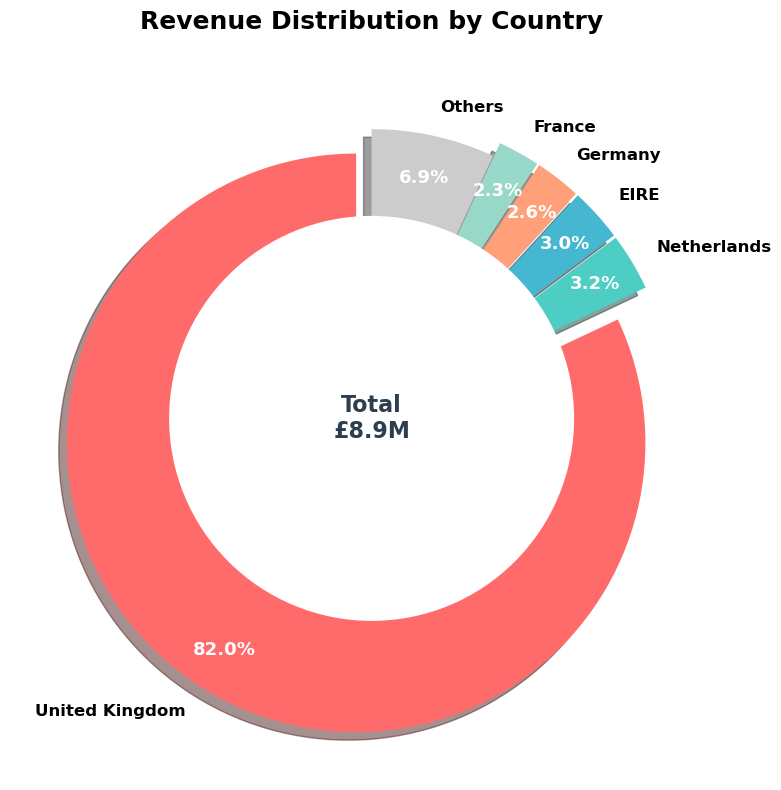

✅ Revenue distribution chart created!

🌍 Top Market: United Kingdom - 82.0% of revenue


In [20]:
# Advanced Revenue Distribution - Top 5 Countries vs Others
country_revenue_all = df_clean.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
top5 = country_revenue_all.head(5)
others = pd.Series({'Others': country_revenue_all[5:].sum()})
pie_data = pd.concat([top5, others])

fig, ax = plt.subplots(figsize=(12, 8))

# Colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#CCCCCC']

# Create pie chart with explosion effect
explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0)

wedges, texts, autotexts = ax.pie(pie_data.values, 
                                    labels=pie_data.index, 
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    textprops={'fontsize': 12, 'fontweight': 'bold'},
                                    pctdistance=0.85)

# Make percentage text white and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title in center
ax.text(0, 0, f'Total\n£{pie_data.sum()/1000000:.1f}M', 
        ha='center', va='center', fontsize=16, fontweight='bold', color='#2C3E50')

ax.set_title('Revenue Distribution by Country', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Revenue distribution chart created!")
print(f"\n🌍 Top Market: {pie_data.index[0]} - {(pie_data.values[0]/pie_data.sum())*100:.1f}% of revenue")

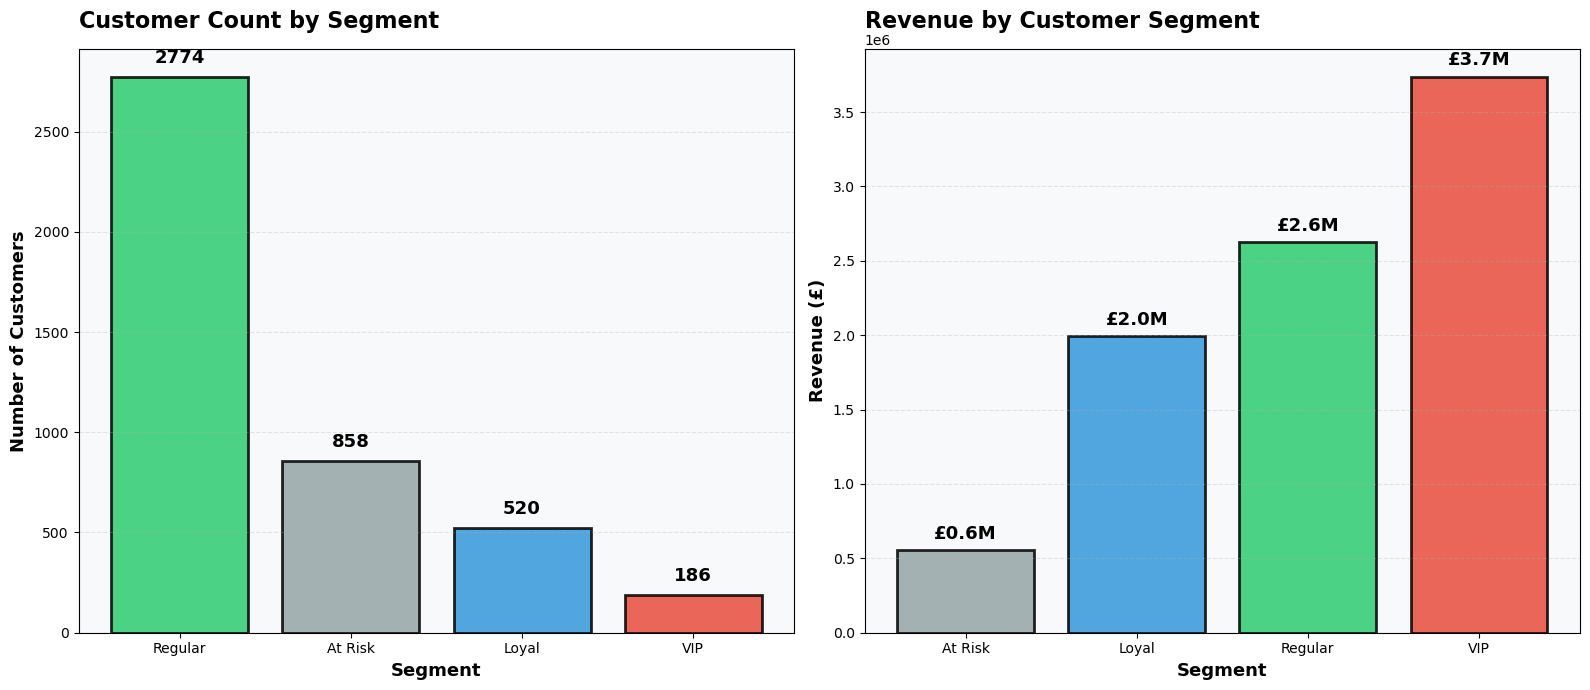

✅ Customer segmentation analysis created!

📊 SEGMENT BREAKDOWN:
   Regular: 2774 customers (£2,624,685)
   At Risk: 858 customers (£555,527)
   Loyal: 520 customers (£1,992,621)
   VIP: 186 customers (£3,738,575)


In [21]:
# Customer Segmentation Analysis
from datetime import datetime

# Calculate RFM
max_date = df_clean['InvoiceDate'].max()

rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Segment customers
def segment_customer(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 10 and row['Monetary'] >= 5000:
        return 'VIP'
    elif row['Recency'] <= 90 and row['Frequency'] >= 5 and row['Monetary'] >= 2000:
        return 'Loyal'
    elif row['Recency'] > 180:
        return 'At Risk'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Count segments
segment_counts = rfm['Segment'].value_counts()
segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

# Create advanced visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Chart 1: Customer Count by Segment
colors_seg = {'VIP': '#E74C3C', 'Loyal': '#3498DB', 'Regular': '#2ECC71', 'At Risk': '#95A5A6'}
bars1 = ax1.bar(segment_counts.index, segment_counts.values, 
                color=[colors_seg[seg] for seg in segment_counts.index],
                edgecolor='black', linewidth=2, alpha=0.85)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax1.set_title('Customer Count by Segment', fontsize=16, fontweight='bold', pad=15, loc='left')
ax1.set_xlabel('Segment', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Customers', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_facecolor('#F8F9FA')

# Chart 2: Revenue by Segment
bars2 = ax2.bar(segment_revenue.index, segment_revenue.values,
                color=[colors_seg[seg] for seg in segment_revenue.index],
                edgecolor='black', linewidth=2, alpha=0.85)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 50000,
            f'£{height/1000000:.1f}M',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax2.set_title('Revenue by Customer Segment', fontsize=16, fontweight='bold', pad=15, loc='left')
ax2.set_xlabel('Segment', fontsize=13, fontweight='bold')
ax2.set_ylabel('Revenue (£)', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_facecolor('#F8F9FA')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("✅ Customer segmentation analysis created!")
print("\n📊 SEGMENT BREAKDOWN:")
for seg in segment_counts.index:
    count = segment_counts[seg]
    revenue = segment_revenue[seg]
    print(f"   {seg}: {count} customers (£{revenue:,.0f})")